# Исследование объявлений о продаже недвижимости России с 2018 по 2021 год. 

Ссылка на датасет: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

### Описание данных:

- date - дата публикации;
- time - время публикации;
- geo_lat - широта;
- geo_lon - долгота;
- region - регион;
- building_type - тип фасада: 0 - другой, 1 - панельный, 2 - монолитный, 3 - кирпичный, 4 - блочный, 5 - деревянный;
- object_type - тип недвижимости: 1 - вторичка, 2 - новостройки;
- level - этаж;
- levels - кол-во этажей в доме;
- rooms - количество комнат, если значение равно `-1` - студия. 
- area - общая площадь;
- kitchen_area - площадь кухни;
- price - стоимость в рублях. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('C:\\datasets\\all_v2.csv')

In [3]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


С названием колонок все в порядке. Проверим наши данные на пропуски и дубликаты, заменим тип данных в столбцах, где это необходимо и заменим некоторые значения. 

In [5]:
#nulls value check 
df.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [6]:
#duplicates check
df.duplicated().sum()

1523

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [10]:
df['time'] = pd.to_datetime(df['time'])

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475483 entries, 0 to 5475482
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   time           datetime64[ns]
 3   geo_lat        float64       
 4   geo_lon        float64       
 5   region         int64         
 6   building_type  int64         
 7   level          int64         
 8   levels         int64         
 9   rooms          int64         
 10  area           float64       
 11  kitchen_area   float64       
 12  object_type    int64         
dtypes: datetime64[ns](2), float64(4), int64(7)
memory usage: 543.1 MB


In [13]:
df.time = df.time.dt.strftime('%H-%M-%S')

In [14]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20-00-21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12-04-54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15-44-00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11-24-52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17-42-43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [15]:
df.building_type = df.building_type.replace(0, 'other')
df.building_type = df.building_type.replace(1, 'panel')
df.building_type = df.building_type.replace(2, 'monolithic')
df.building_type = df.building_type.replace(3, 'brick')
df.building_type = df.building_type.replace(4, 'blocky')
df.building_type = df.building_type.replace(5, 'wooden')

In [16]:
df.rooms = df.rooms.replace(-2, 2)

In [17]:
df.object_type.value_counts()

1     3863594
11    1611889
Name: object_type, dtype: int64

Проведем исследовательский анализ данных. 

In [18]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20-00-21,59.805808,30.376141,2661,panel,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12-04-54,55.683807,37.297405,81,brick,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15-44-00,56.295250,44.061637,2871,panel,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11-24-52,44.996132,39.074783,2843,blocky,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17-42-43,55.918767,37.984642,81,brick,13,14,2,60.0,10.0,1


In [19]:
df['year'] = df.date.dt.year

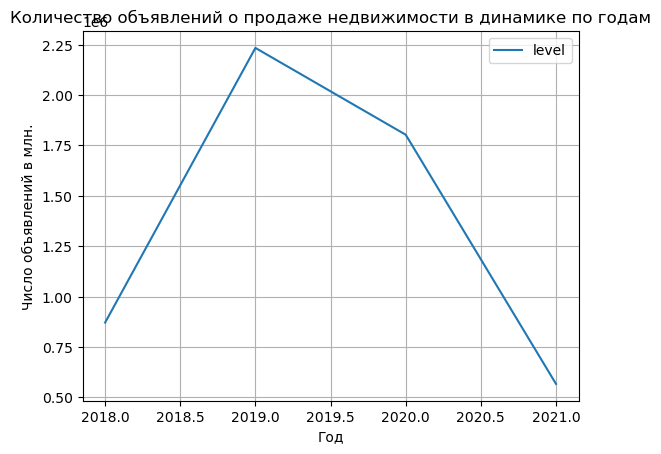

In [20]:
df.pivot_table(index='year', values='level', aggfunc='count').plot(
    title='Количество объявлений о продаже недвижимости в динамике по годам', 
    xlabel='Год',
    ylabel='Число объявлений в млн.',
    grid=True);

Наибольшее количество объявлений выложили в 19 году. 

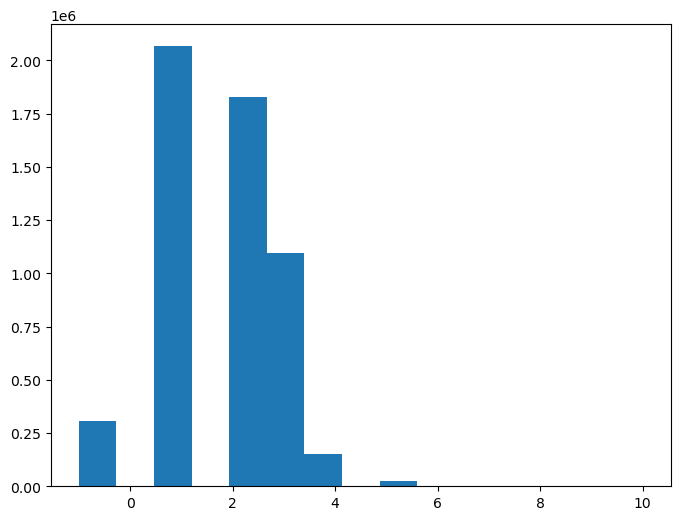

In [21]:
plt.figure(figsize=(8,6))

plt.hist(x=df['rooms'], bins=15)
plt.show;


Больше всего объявлений о продажах однокомнатных апартаментов, далее идут двух и трехкомнатные соответственно. Студий чуть больше, чем квартир с 4 комнатами. 

In [22]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,20-00-21,59.805808,30.376141,2661,panel,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,12-04-54,55.683807,37.297405,81,brick,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,15-44-00,56.295250,44.061637,2871,panel,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,11-24-52,44.996132,39.074783,2843,blocky,12,16,2,38.0,5.0,11,2018
4,5450000,2018-03-01,17-42-43,55.918767,37.984642,81,brick,13,14,2,60.0,10.0,1,2018


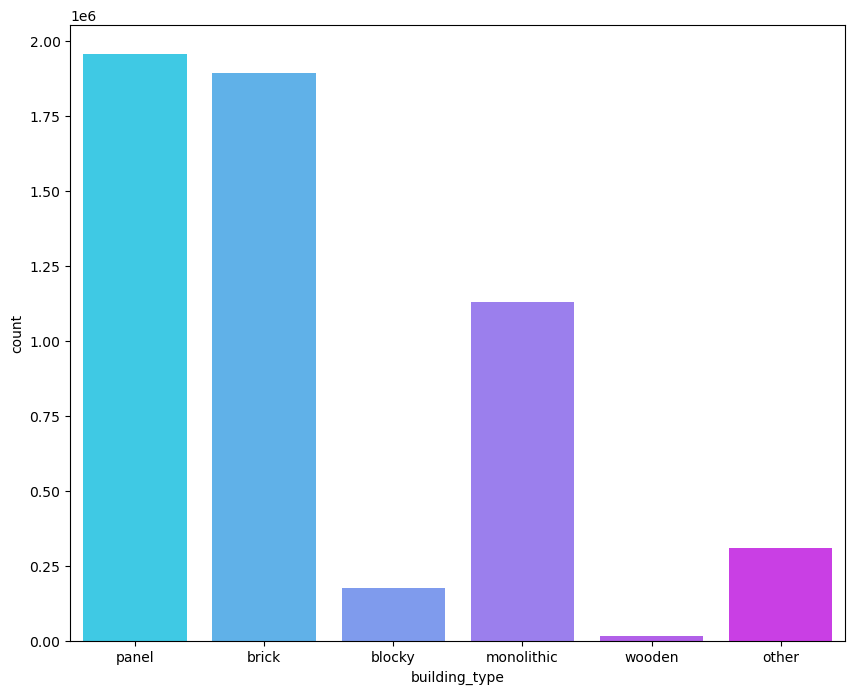

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.building_type, palette='cool');

По графику можем сделать вывод, что большинство апартаментов находятся в панельных, либо в кирпичных зданиях.


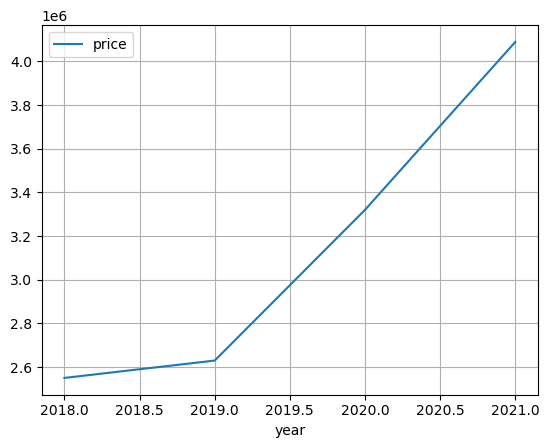

In [24]:
df.pivot_table(index='year', values='price', aggfunc='median').plot(
        grid=True);

С каждым годом медианная цена на апартаменты растет, причем растет очень быстро. 

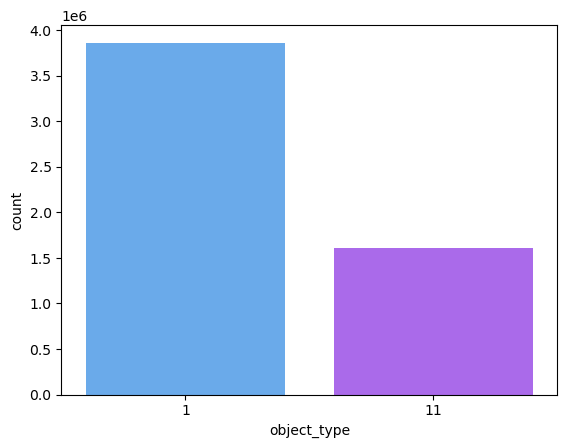

In [25]:
sns.countplot(x=df.object_type, palette='cool');

Цифрой 1 обозначены апартаменты со вторичного рынка, 11 - новостройки. Вторичек более, чем в два раза больше. 

Теперь посмотрим на зависимость цены от параметров, представленных в таблице. 

In [26]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,20-00-21,59.805808,30.376141,2661,panel,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,12-04-54,55.683807,37.297405,81,brick,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,15-44-00,56.295250,44.061637,2871,panel,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,11-24-52,44.996132,39.074783,2843,blocky,12,16,2,38.0,5.0,11,2018
4,5450000,2018-03-01,17-42-43,55.918767,37.984642,81,brick,13,14,2,60.0,10.0,1,2018


<AxesSubplot:xlabel='building_type'>

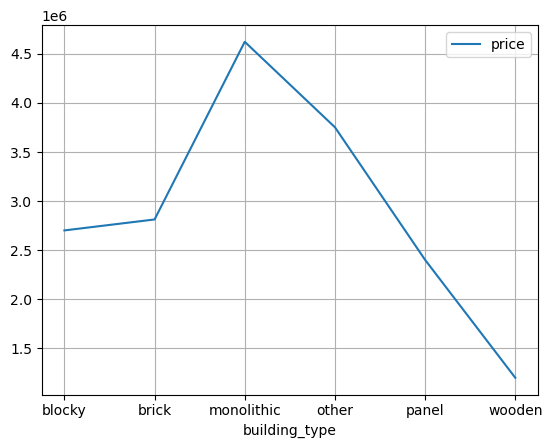

In [27]:
df.pivot_table(index='building_type', values='price', aggfunc='median').plot(grid=True)

Самые дорогие апартаменты в монолитных типах зданий. 

<AxesSubplot:xlabel='level'>

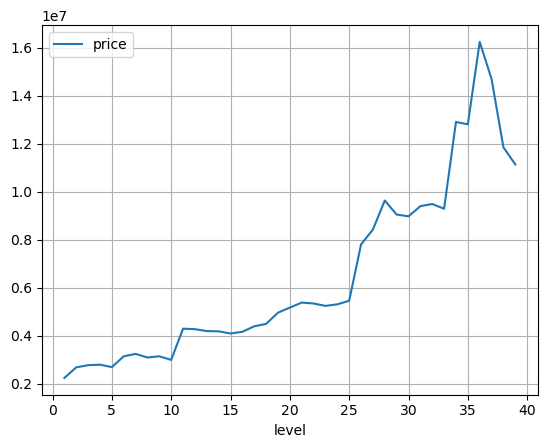

In [28]:
df.pivot_table(index='level', values='price', aggfunc='median').plot(grid=True)

Наблюдается зависимость цены от этажа, на котором находится квартира, чем выше она располагается, тем выше и цена. 

In [31]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,price,geo_lat,geo_lon,region,level,levels,rooms,area,kitchen_area,object_type,year
price,1.000000,0.037444,-0.062810,-0.072859,0.040198,0.052865,0.074298,0.121268,0.061891,0.006461,0.029268
geo_lat,0.037444,1.000000,0.115743,0.022777,0.043650,0.081339,0.012254,0.001022,-0.013473,0.125033,0.041510
geo_lon,-0.062810,0.115743,1.000000,0.763456,-0.103314,-0.145745,-0.070385,-0.028171,-0.079705,0.069164,-0.112236
region,-0.072859,0.022777,0.763456,1.000000,-0.118487,-0.164946,-0.090940,-0.010417,-0.057182,0.113245,-0.110195
level,0.040198,0.043650,-0.103314,-0.118487,1.000000,0.660741,-0.043936,0.051822,0.107590,0.241900,0.046808
levels,0.052865,0.081339,-0.145745,-0.164946,0.660741,1.000000,-0.101680,0.051161,0.147534,0.379375,0.068174
rooms,0.074298,0.012254,-0.070385,-0.090940,-0.043936,-0.101680,1.000000,0.503045,0.155528,-0.139729,0.002545
area,0.121268,0.001022,-0.028171,-0.010417,0.051822,0.051161,0.503045,1.000000,0.270602,0.007507,0.006986
kitchen_area,0.061891,-0.013473,-0.079705,-0.057182,0.107590,0.147534,0.155528,0.270602,1.000000,0.098308,0.024211
object_type,0.006461,0.125033,0.069164,0.113245,0.241900,0.379375,-0.139729,0.007507,0.098308,1.000000,-0.026225


И напоследок взглянем на матрицу корреляций. 

Самая высокая положительная корреляция наблюдается между количеством комнат и общей прощадью, так же стоит отметить высокую корреляцию между типом объекта и количеством этажей в доме, скорее всего новостройки имеют большее количество этажей в сравнении с вторичками, проверим эту гипотезу далее. Наибольшую корреляцию к цене имеют общая площать, площать кухни и количество комнат, однако, зависимость очень слабая. 


Проверим гипотезу о том, что новостройки имеют большее количество этажей в домах.

In [35]:
df.groupby('object_type')['levels'].mean()

object_type
1      9.796151
11    15.235805
Name: levels, dtype: float64

Гипотеза подтвердилась. В среднем, количество этажей во вторичках равняеятся 9.8, а в новостройках - 15.2. 